## Post Modeling Data Exploration

In [1]:
import sys
import os
import time


import numpy as np
import pandas as pd
import seaborn as sns
import rasterio
import matplotlib.pyplot as plt
import shutil

from spectral import *
from skimage import io
%matplotlib inline

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore')

In [2]:
training = pd.read_csv("./converted_data_files/files_and_labels_dataframe.csv")
training.head()

,image_name,labels,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [3]:
label_columns = training.columns[2:]

In [4]:
# Loading in post training predictions and true values from the validation set
pred = np.load("./run_val_preds/<keras.engine.sequential.Sequential object at 0x7f6c6876d400>.validation_pred.npy")
val = np.load("./run_val_true/<keras.engine.sequential.Sequential object at 0x7f6c6876d400>.y_val.npy")

In [5]:
# Converting predictions to binary based on optimal threshold
binary_pred = (pred > 0.16).astype(int)

In [6]:
# Predictions dataframe
pred_df = pd.DataFrame(binary_pred)
pred_df.columns = label_columns
pred_df.head()

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0
4,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0


In [7]:
# true vales dataframe
val_df = pd.DataFrame(val)
val_df.columns = label_columns
val_df.head()

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0


In [8]:
pred_df.shape

(10120, 17)

In [9]:
# predictions for each label
pred_df.sum().sort_values(ascending = False)

primary              10118
clear                 9392
agriculture           5430
road                  3840
cultivation           3723
partly_cloudy         3611
water                 3417
habitation            2276
haze                  1107
cloudy                 904
artisinal_mine          62
bare_ground             32
selective_logging        2
blow_down                0
conventional_mine        0
blooming                 0
slash_burn               0
dtype: int64

In [10]:
# total values in predictions
pred_df.sum().sort_values(ascending = False).sum()

43914

In [11]:
# true labels frequencies for each category
val_df.sum().sort_values(ascending = False)

primary              9377
clear                7152
agriculture          3057
road                 1970
partly_cloudy        1802
water                1794
cultivation          1078
habitation            914
haze                  661
cloudy                505
bare_ground           228
selective_logging      87
blooming               84
artisinal_mine         82
slash_burn             59
blow_down              29
conventional_mine      23
dtype: int64

In [12]:
# total true values
val_df.sum().sort_values(ascending = False).sum()

28902

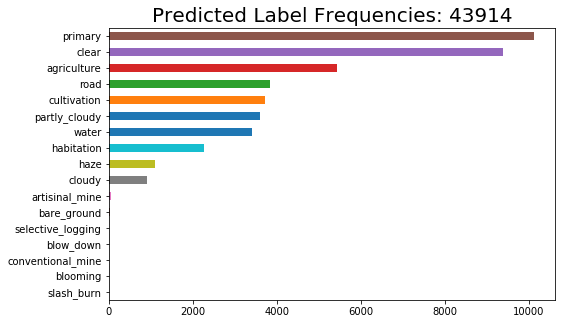

In [13]:
plt.figure(figsize = (8,5))
plt.title("Predicted Label Frequencies: 43914", fontsize = 20)
pred_df.sum().sort_values().plot.barh();

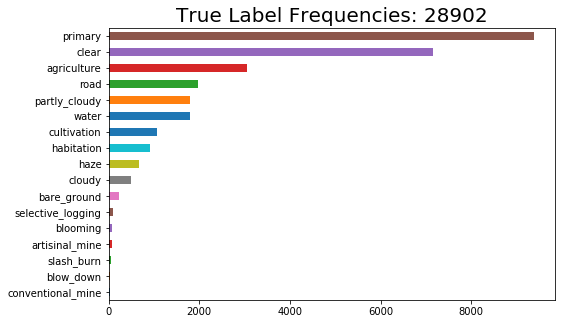

In [14]:
plt.figure(figsize = (8,5))
plt.title("True Label Frequencies: 28902", fontsize = 20)
val_df.sum().sort_values().plot.barh();